<a href="https://colab.research.google.com/github/2youngje/DeepLearning_V2/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [ ]:
# 이미지를 텐서(Tensor)로 변환
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 훈련용 데이터셋
train_dataset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# 테스트용 데이터셋
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# 클래스 레이블
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = models.resnet50(weights = models.ResNet50_Weights.DEFAULT)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7f22d39f6030>

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

In [ ]:
model.fc.in_features

2048

In [ ]:
model.fc = (
    nn.Sequential(
        nn.Linear(model.fc.in_features,1024),
        nn.Linear(1024,512),
        nn.Linear(512,10),
        nn.LogSoftmax(dim=1)
    )
)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='dataset',
                                 train=True,
                                 download=True,
                                 transform = transform)

test_dataset = datasets.CIFAR10(root = 'dataset',
                                train=False,
                                transform=transform)

Files already downloaded and verified


In [ ]:
train_idx,val_idx = train_test_split(
    range(len(train_dataset)),
    stratify = train_dataset.targets,
    test_size = 0.2
)

In [ ]:
train_idx

[48305,
 530,
 35664,
 33799,
 12186,
 30621,
 8439,
 37286,
 27215,
 47035,
 24301,
 12530,
 25601,
 21596,
 28246,
 5245,
 33951,
 42909,
 21005,
 11574,
 22650,
 16225,
 38637,
 4932,
 20856,
 25829,
 3813,
 42077,
 2259,
 18331,
 32553,
 48530,
 22610,
 3672,
 33784,
 6897,
 35332,
 17155,
 30820,
 37398,
 7274,
 317,
 14267,
 17282,
 43848,
 46231,
 2314,
 11247,
 1225,
 29105,
 17882,
 49696,
 23973,
 4170,
 30510,
 39471,
 27820,
 20332,
 41269,
 49457,
 45689,
 45024,
 29056,
 29359,
 46809,
 48688,
 15422,
 20236,
 30921,
 13103,
 31642,
 32659,
 26097,
 28568,
 25587,
 39023,
 39108,
 31078,
 32601,
 3167,
 38068,
 17923,
 277,
 8747,
 12549,
 23254,
 49791,
 5257,
 36031,
 13296,
 11195,
 9674,
 24340,
 24635,
 40815,
 17190,
 15213,
 25851,
 17171,
 8157,
 25607,
 954,
 32031,
 8931,
 493,
 9793,
 42936,
 13017,
 26602,
 23796,
 184,
 19721,
 19804,
 6291,
 25028,
 28014,
 18372,
 15498,
 6882,
 11944,
 10419,
 14700,
 16527,
 19923,
 14408,
 14402,
 45895,
 36852,
 36016,


In [ ]:
train_dataset = Subset(train_dataset, train_idx)
validation_dataset = Subset(train_dataset, val_idx)
print(len(train_dataset),len(validation_dataset),len(test_dataset))

40000 10000 10000


In [ ]:
batch_size = 128
train_batches = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
val_batches = DataLoader(validation_dataset, batch_size = batch_size, shuffle = True)
test_batches = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_func = nn.NLLLoss()
num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs,labels in train_batches:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss : {total_loss / len(train_batches)}')

Epoch 1/2, Loss : 1.9898299748143449
Epoch 2/2, Loss : 1.875080907306732


In [ ]:
total_loss = 0
correct = 0
wrong_input, wrong_preds_idx, actual_preads_idx = list(), list(), list()
model.eval()
with torch.no_grad():
  for test_input, test_label in test_batches:
    test_input = test_input.to(device)
    test_label = test_label.to(device)
    y_test_pred = model(test_input)
    test_loss = loss_func(y_test_pred, test_label)
    total_loss += test_loss
    pred_label = torch.argmax(y_test_pred, dim = 1)
    correct += pred_label.eq(test_label).sum().item() # 실제 맞춘 정답 개수

    wrong_idx = pred_label.ne(test_label).nonzero()[:,0].cpu().numpy().tolist()
    for index in wrong_idx:
      wrong_input.append(test_input[index].cpu()) # 잘못 예측한 X 값
      wrong_preds_idx.append(pred_label[index].cpu()) # 잘못 예측한  Y값
      actual_preads_idx.append(test_label[index].cpu()) # 실제 Y값
total_loss = total_loss / len(test_batches)
accuracy = (correct / len(test_batches.dataset)) * 100

In [ ]:
accuracy

35.120000000000005

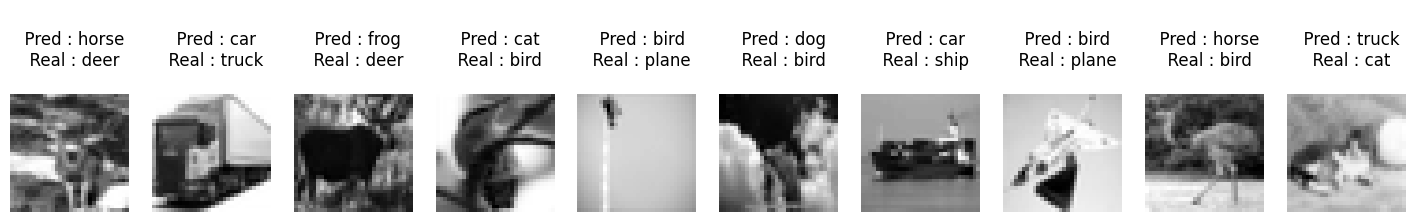

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 20))

for idx in range(10):
  plt.subplot(10, 10, idx + 1)
  plt.axis('off')
  plt.imshow(wrong_input[idx][0,:,:].numpy(), cmap = 'gray')
  plt.title(f"""
  Pred : {str(classes[wrong_preds_idx[idx].item()])}
  Real : {str(classes[actual_preads_idx[idx].item()])}
  """)